# Clustering

In contrast to *supervised* machine learning, *unsupervised* learning is used when there is no "ground truth" from which to train and validate label predictions. The most common form of unsupervised learning is *clustering*, which is similar conceptually to *classification*, except that the the training data does not include known values for the class label to be predicted. Clustering works by separating the training cases based on similarities that can be determined from their feature values. Think of it this way; the numeric features of a given entity can be thought of as vector coordinates that define the entity's position in n-dimensional space. What a clustering model seeks to do is to identify groups, or *clusters*, of entities that are close to one another while being separated from other clusters.

In [1]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

--2023-08-17 02:37:58--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: 'seeds.csv.1'

     0K .........                                             100%  452K=0.02s

2023-08-17 02:37:59 (452 KB/s) - 'seeds.csv.1' saved [9386/9386]



In [2]:
data.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
data.shape

(210, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   kernel_length          210 non-null    float64
 4   kernel_width           210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   groove_length          210 non-null    float64
 7   species                210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [5]:
data.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
84,19.51,16.71,0.8780,6.366,3.801,2.962,6.185,1
147,12.49,13.46,0.8658,5.267,2.967,4.421,5.002,2
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,0
134,15.56,14.89,0.8823,5.776,3.408,4.972,5.847,1
74,16.82,15.51,0.8786,6.017,3.486,4.004,5.841,1
72,17.26,15.73,0.8763,5.978,3.594,4.539,5.791,1
164,11.14,12.79,0.8558,5.011,2.794,6.388,5.049,2
39,14.28,14.17,0.8944,5.397,3.298,6.685,5.001,0
138,15.60,15.11,0.8580,5.832,3.286,2.725,5.752,1
196,12.79,13.53,0.8786,5.224,3.054,5.483,4.958,2


In [6]:
data.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [7]:
features=data[data.columns[0:6]]
features.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
65,12.88,13.50,0.8879,5.139,3.119,2.352
29,13.45,14.02,0.8604,5.516,3.065,3.531
57,14.92,14.43,0.9006,5.384,3.412,1.142
149,10.79,12.93,0.8107,5.317,2.648,5.462
198,12.62,13.67,0.8481,5.410,2.911,3.306
23,12.08,13.23,0.8664,5.099,2.936,1.415
131,18.94,16.32,0.8942,6.144,3.825,2.908
39,14.28,14.17,0.8944,5.397,3.298,6.685
14,13.74,14.05,0.8744,5.482,3.114,2.932
104,18.95,16.42,0.8829,6.248,3.755,3.368


As you can see, the dataset contains six data points (or *features*) for each instance (*observation*) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot; so we'll take advantage of a mathematical technique called *Principal Component Analysis* (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the six-dimensional feature values into two-dimensional coordinates.

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaled_features= MinMaxScaler().fit_transform(features)

pca=PCA(n_components=2).fit(scaled_features)
features_2d=pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

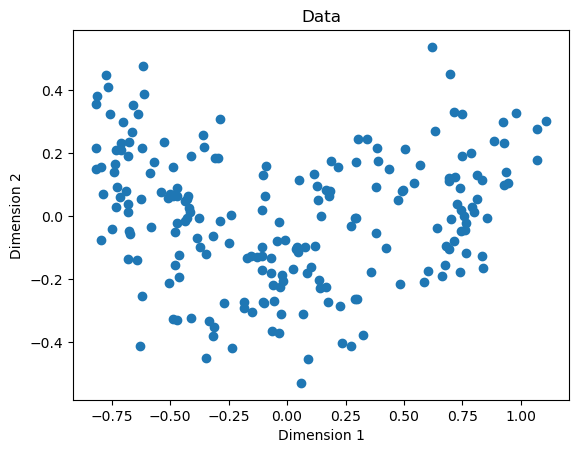

In [9]:
from matplotlib import pyplot as plt
plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Hopefully you can see at least two, arguably three, reasonably distinct groups of data points; but here lies one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the *within cluster sum of squares* (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

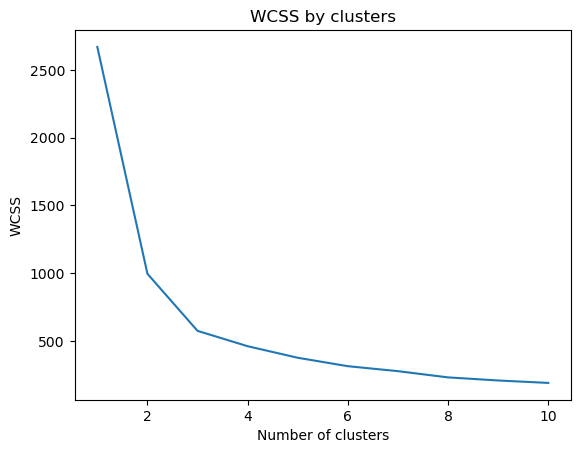

In [10]:
import numpy as np
from sklearn.cluster import KMeans

# Create 10 models with 1 to 10 clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    # fit the data points
    kmeans.fit(features.values)
    # get the wcss (inertia) value
    wcss.append(kmeans.inertia_)
    
# plot the wcss value into line plot
plt.plot(range(1,11),wcss)
plt.title('WCSS by clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The plot shows a large reduction in WCSS (so greater *tightness*) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

## Evaluate different types of clustering
## Training a clustering model

There are multiple algorithms you can use for clustering. One of the most commonly used algorithms is K-Means clustering that, in its simplest form, consists of the following steps:


The feature values are vectorized to define n-dimensional coordinates (where n is the number of features). In the flower example, we have two features (number of petals and number of leaves), so the feature vector has two coordinates that we can use to conceptually plot the data points in two-dimensional space.

You decide how many clusters you want to use to group the flowers and call this value k. For example, to create three clusters, you would use a k value of 3. Then k points are plotted at random coordinates. These points will ultimately be the center points for each cluster, so they're referred to as centroids.

Each data point (in this case flower) is assigned to its nearest centroid.

Each centroid is moved to the center of the data points assigned to it based on the mean distance between the points.

After moving the centroid, the data points may now be closer to a different centroid, so the data points are reassigned to clusters based on the new closest centroid.

The centroid movement and cluster reallocation steps are repeated until the clusters become stable or a pre-determined maximum number of iterations is reached.


## Hierarchical Clustering
Hierarchical clustering is another type of clustering algorithm in which clusters themselves belong to a larger group, which belong to even larger groups, and so on. The result is that data points can be clusters in differing degrees of precision: with a large number of very small and precise groups, or a small number of larger groups.

For example, if we apply clustering to the meanings of words, we may get a group containing adjectives specific to emotions (‘angry’, ‘happy’, and so on), which itself belongs to a group containing all human-related adjectives (‘happy’, ‘handsome’, ‘young’), and this belongs to an even higher group containing all adjectives (‘happy’, ‘green’, ‘handsome’,

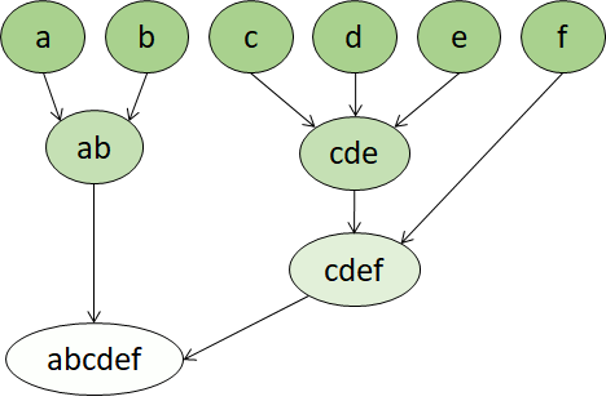

## K-Means Clustering

The algorithm we used to create our test clusters is *K-Means*. This is a commonly used clustering algorithm that separates a dataset into *K* clusters of equal variance. The number of clusters, *K*, is user defined. The basic algorithm has the following steps:

1. A set of K centroids are randomly chosen.
2. Clusters are formed by assigning the data points to their closest centroid.
3. The means of each cluster is computed and the centroid is moved to the mean.
4. Steps 2 and 3 are repeated until a stopping criteria is met. Typically, the algorithm terminates when each new iteration results in negligable movement of centroids and the clusters become static.
5. When the clusters stop changing, the algorithm has *converged*, defining the locations of the clusters - note that the random starting point for the centroids means that re-running the algorithm could result in slightly different clusters, so training usually involves multiple iterations, reinitializing the centroids each time, and the model with the best WCSS is selected.

Let's try using K-Means on our seeds data with a K value of 3.

In [11]:
from sklearn.cluster import KMeans
# create a model with 3 centroids
model= KMeans(n_clusters=3,init='k-means++',n_init=100,max_iter=1000)
#fit the data and predict clusters assignment for each data point
km_clusters=model.fit_predict(features.values)
#view the clusters assignment
km_clusters


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

let see those clusters assignments with 2 dimensional data points.


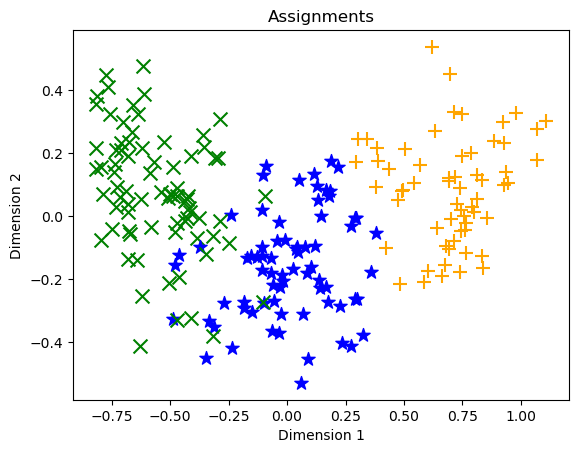

In [15]:
import matplotlib.pyplot as plt

#samples: This is a list of sample points, where each sample is represented as a two-dimensional 
# coordinate (presumably [x, y]).
# clusters: This is a list of cluster assignments, where each value indicates the cluster to 
#which the corresponding sample belongs.

def plot_clusters(samples,clusters):

    # col_dic and mrc_dic are dictionaries that map cluster labels (0, 1, 2) to colors ('blue', 'green', 'orange') and markers ('*', 'x', '+') respectively.
    #This is done so that each cluster can be represented with a distinct color and marker in the scatter plot.
    
    col_dic={0:'blue',1:'green',2:'orange'}
    mrc_dic={0:'*',1:'x',2:'+'}
    colors=[col_dic[x] for x in clusters] # list comprehension:  For each cluster label in clusters,
                                            #the corresponding color and marker are retrieved from the dictionaries, 
                                            #and these lists are used to set the color and marker attributes for each point in the scatter plot.
    markers=[mrc_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0],samples[sample][1],color=colors[sample],marker=markers[sample],s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()
    
plot_clusters(features_2d,km_clusters)    

In [19]:
features_2d

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998],
       [ 0.04975325,  0.11432028],
       [-0.09938031, -0.27557236],
       [-0.13062753, -0.12970254],
       [-0.15462946, -0.12523441],
       [-0.17233814, -0.13131305],
       [-0.02126708, -0.18689759],
       [-0.10315113, -0.27180239],
       [ 0.23409894, -0.40314946],
       [ 0.05753928, -0.52836436],
       [-0.38360924, -0.06798852],
       [-0.10863786,  0.01920138],
       [-0.10733386, -0.12645048],
       [ 0.27237893, -0.41187202],
       [-0.48875922, -0.32450789],
       [ 0.07481607, -0.09670404],
       [ 0.30095947, -0.26136501],
       [-0.31813214, -0.06247802],
       [-0.37187081, -0.09589158],
       [-0.06952662,

In [20]:
km_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

the data has been separated into three distinct clusters.

So what's the practical use of clustering? In some cases, you may have data that you need to group into distinct clusters without knowing how many clusters there are or what they indicate. For example, a marketing organization might want to separate customers into distinct segments, and then investigate how those segments exhibit different purchasing behaviors.

Sometimes, clustering is used as an initial step towards creating a classification model. You start by identifying distinct groups of data points, and then assign class labels to those clusters. You can then use this labelled data to train a classification model.

In the case of the seeds data, the different species of seed are already known and encoded as 0 (*Kama*), 1 (*Rosa*), or 2 (*Canadian*), so we can use these identifiers to compare the species classifications to the clusters identified by our unsupervised algorithm.

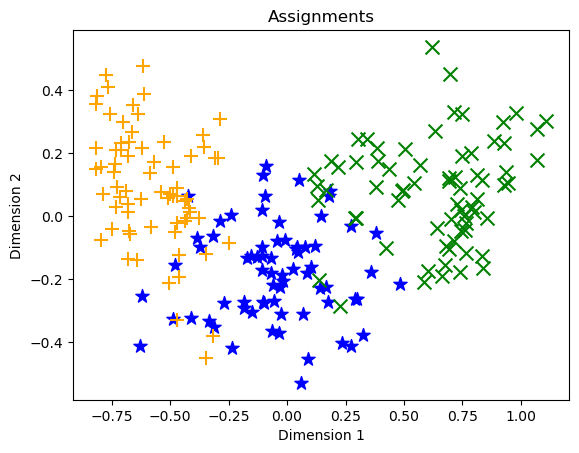

In [21]:
seed_species=data[data.columns[7]]
plot_clusters(features_2d,seed_species.values)

There may be some differences between the cluster assignments and class labels, but the K-Means model should have done a reasonable job of clustering the observations so that seeds of the same species are generally in the same cluster.

## Hierarchical Clustering

Hierarchical clustering methods make fewer distributional assumptions when compared to K-means methods. However, K-means methods are generally more scalable, sometimes very much so.

Hierarchical clustering creates clusters by either a *divisive* method or *agglomerative* method. The divisive method is a "top down" approach starting with the entire dataset and then finding partitions in a stepwise manner. Agglomerative clustering is a "bottom up" approach. In this lab you will work with agglomerative clustering which roughly works as follows:

1. The linkage distances between each of the data points is computed.
2. Points are clustered pairwise with their nearest neighbor.
3. Linkage distances between the clusters are computed.
4. Clusters are combined pairwise into larger clusters.
5. Steps 3 and 4 are repeated until all data points are in a single cluster.

The linkage function can be computed in a number of ways:
- Ward linkage measures the increase in variance for the clusters being linked,
- Average linkage uses the mean pairwise distance between the members of the two clusters,
- Complete or Maximal linkage uses the maximum distance between the members of the two clusters.

Several different distance metrics are used to compute linkage functions:
- Euclidian or l2 distance is the most widely used. This metric is only choice for the Ward linkage method.
- Manhattan or l1 distance is robust to outliers and has other interesting properties.
- Cosine similarity, is the dot product between the location vectors divided by the magnitudes of the vectors. Notice that this metric is a measure of similarity, whereas the other two metrics are measures of difference. Similarity can be quite useful when working with data such as images or text documents.

### Agglomerative Clustering

Let's see an example of clustering the seeds data using an agglomerative clustering algorithm.

In [22]:
from sklearn.cluster import AgglomerativeClustering
agg_model= AgglomerativeClustering(n_clusters=3)
agg_clusters=agg_model.fit_predict(features.values)
agg_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

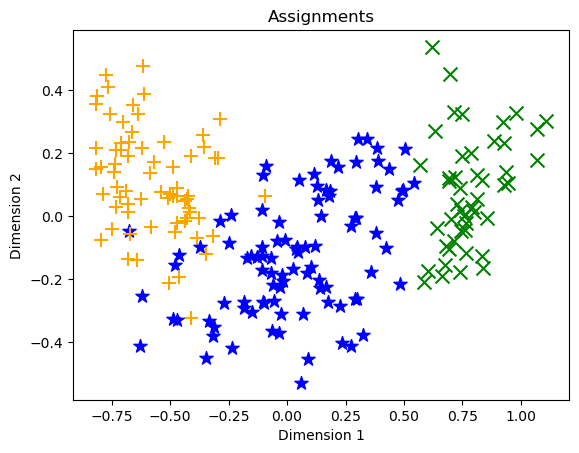

In [23]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, agg_clusters)